

# Stock Market Prediction
---





## An AI based model to predict when to Buy, Sell or Hold Stocks

Stock prices are influenced by various factors, including `market sentiment`, `economic indicators`, and `company performance`. Deep Learning models can analyze vast datasets to identify hidden relationships and trends, providing a more accurate prediction of future price movements.

Commonly used Deep Learning models for stock prediction include Recurrent Neural Networks (`RNNs`) and Long Short-Term Memory (`LSTM`) networks. These models excel in processing sequential data, making them ideal for analyzing time-series stock data and improving prediction accuracy.

But as we haven't yet been taught these models, we somehow have to replicate their ability to capture relations in sequential data using traditional Artificial Neural Networks (`ANNs`) namely : Multilayer Perceptrons (`MLPs`)

In this project, we are only going to use `economic indicators` for our model training.

### Fetching Historical Stock Data Using `yfinance`
The following code uses the `yfinance` library to download historical stock data for a specific `ticker`(stock) within a defined date range.

- `ticker`: Using 'INFY.NS' for Infosys on the National Stock Exchange (NSE) of India as an example stock.

- `start_date` and `end_date`: Defines the time frame for historical data, starting from January 1, 2000, to January 1, 2024.

- Download the Stock Data:Use the `yf.download()` method with the `ticker`, `start_date`, and `end_date` as arguments to fetch historical data.

- Select only the required columns: `Open`, `High`, `Low`, `Close`, and `Volume`.

- Display the Data: The resulting DataFrame (stored in `stock_data`) contains daily records of stock prices and volumes within the specified date range.

In [40]:
# from google.colab import drive
# drive.mount('/content/drive')


In [41]:
import yfinance as yf
import pandas as pd

ticker = 'INFY.NS'
start_date = '2000-01-01'
end_date = '2024-01-01'

stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

stock_data

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2000-01-03 00:00:00+00:00,122.070312,122.071877,122.070312,122.071877,657536
2000-01-04 00:00:00+00:00,131.250000,131.837891,126.976562,131.686722,7191808
2000-01-05 00:00:00+00:00,122.664062,126.953125,121.151955,121.151955,21069440
2000-01-06 00:00:00+00:00,119.192581,119.531250,111.459763,111.459763,10495616
2000-01-07 00:00:00+00:00,102.542969,102.542969,102.542969,102.542969,971392
...,...,...,...,...,...
2023-12-22 00:00:00+00:00,1534.949951,1566.000000,1523.000000,1562.900024,6741060
2023-12-26 00:00:00+00:00,1535.000000,1548.000000,1523.000000,1543.949951,6878067


In [42]:
stock_data.dropna(inplace=True)
stock_data.reset_index(inplace=True)

stock_data.head()

Price,Date,Open,High,Low,Close,Volume
Ticker,,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
0,2000-01-03 00:00:00+00:00,122.070312,122.071877,122.070312,122.071877,657536
1,2000-01-04 00:00:00+00:00,131.250000,131.837891,126.976562,131.686722,7191808
2,2000-01-05 00:00:00+00:00,122.664062,126.953125,121.151955,121.151955,21069440
3,2000-01-06 00:00:00+00:00,119.192581,119.531250,111.459763,111.459763,10495616
4,2000-01-07 00:00:00+00:00,102.542969,102.542969,102.542969,102.542969,971392


In [43]:
# !pip install ta

In [44]:
stock_data['Close'][ticker]

,INFY.NS
0,122.071877
1,131.686722
2,121.151955
3,111.459763
4,102.542969
...,...
5988,1562.900024
5989,1543.949951
5990,1567.099976
5991,1562.650024


### Technical Analysis with `ta` Library
The following Python code calculates key technical indicators to support technical analysis on historical stock data using the ta library. Each indicator provides insights into stock trends, volatility, momentum, and price patterns.

1.  Import Technical Analysis Libraries:
    - Indicators from the ta library: `RSIIndicator`, `StochasticOscillator`, `MACD`, `SMAIndicator`, `EMAIndicator`, `BollingerBands`, `AverageTrueRange`.

3. Bollinger Bands: It is a technical analysis tool used to determine where prices are high and low relative to each other.
  - Adds `Bollinger_High` and `Bollinger_Low` based on a 20-day moving average to assess volatility.

4. Average True Range (ATR): ATR shows investors the average range prices swing for an investment over a specified period.
  - `ATR` with a 14-day window to measure market volatility.

5. Relative Strength Index (RSI): RSI measures the speed and magnitude of a security's recent price changes to detect overvalued or undervalued conditions in the price of that security.
  - `RSI` calculated over a 14-day period, helpful for identifying overbought or oversold conditions.

6. MACD (Moving Average Convergence Divergence): The MACD line is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
  - Includes `MACD` line and `MACD_Signal`(9day EMA of MACD) for identifying trend changes and momentum strength.

7. Lagged Returns:

  - Calculates returns over 5, 10, and 20 days and stores them in `Return_given_5d`, `Return_given_10d`, and `Return_given_20d`.
  - `Close_5d` and `Next_day_close` capture closing prices 5 days and 1 day ahead, respectively.

The choice to use `Close_5d` as the predicted next price leverages the lagging characteristics of technical indicators. Because technical indicators are generally derived from past data, they respond to price trends with a delay, capturing historical patterns rather than immediate shifts.

Using a target price five days ahead (`Close_5d`) allows the model to correlate current indicator values with near-term future prices, aligning better with the lag and helping the model more accurately capture price movement patterns that indicators inherently reflect.

In [45]:
from ta.momentum import RSIIndicator, StochasticOscillator
from ta.trend import MACD
from ta.volatility import BollingerBands, AverageTrueRange


# Bollinger Bands (uses 20 day moving average)
stock_data['Bollinger_High', ticker] = BollingerBands(stock_data['Close'][ticker]).bollinger_hband()
stock_data['Bollinger_Low', ticker] = BollingerBands(stock_data['Close'][ticker]).bollinger_lband()

# ATR
stock_data['ATR', ticker] = AverageTrueRange(stock_data['High'][ticker], stock_data['Low'][ticker], stock_data['Close'][ticker], window=14).average_true_range()

# Add RSI
stock_data['RSI', ticker] = RSIIndicator(stock_data['Close'][ticker], window=14).rsi()

# Add MACD
macd = MACD(stock_data['Close'][ticker])
stock_data['MACD', ticker] = macd.macd()
stock_data['MACD_Signal', ticker] = macd.macd_signal()

# Lagged Returns (e.g., returns over past day, week, month)
stock_data['Return_given_5d',ticker] = stock_data['Close'][ticker].pct_change(5)
stock_data['Return_given_10d',ticker] = stock_data['Close'][ticker].pct_change(10)
stock_data['Return_given_20d',ticker] = stock_data['Close'][ticker].pct_change(20)

stock_data['Close_5d', ticker] = stock_data['Close'][ticker].shift(-5)

stock_data['Next_day_close', ticker] = stock_data['Close'][ticker].shift(-1)


stock_data.dropna(inplace=True)
stock_data

Price,Date,Open,High,Low,Close,Volume,Bollinger_High,Bollinger_Low,ATR,RSI,MACD,MACD_Signal,Return_given_5d,Return_given_10d,Return_given_20d,Close_5d,Next_day_close
Ticker,,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
33,2000-02-17 00:00:00+00:00,156.250000,168.750000,156.250000,160.910934,12125248,169.728929,90.274352,9.229328,71.324947,12.757133,9.131333,0.118286,0.384031,0.615793,145.265625,154.134369
34,2000-02-18 00:00:00+00:00,162.796875,164.062500,152.734375,154.134369,10628288,171.758242,93.173945,9.379242,64.939008,12.557019,9.816471,-0.008159,0.249166,0.470112,140.425003,160.230469
35,2000-02-21 00:00:00+00:00,153.906250,164.062500,151.578125,160.230469,17751552,174.497881,95.614540,9.601037,67.737407,12.743433,10.401863,-0.045310,0.206981,0.477757,132.964066,153.595306
36,2000-02-22 00:00:00+00:00,161.546875,161.546875,152.343750,153.595306,12066560,175.725245,98.723738,9.572615,61.942355,12.214958,10.764482,-0.013216,0.104729,0.393411,137.178131,143.983597
37,2000-02-23 00:00:00+00:00,164.062500,164.062500,141.307816,143.983597,11944576,175.440368,102.384006,10.514191,54.648742,10.894964,10.790578,-0.081980,0.058004,0.306214,148.152344,145.265625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,2023-12-15 00:00:00+00:00,1523.050049,1588.550049,1521.000000,1578.400024,18395389,1528.906513,1402.133501,29.796186,72.401704,23.950700,15.926813,0.058512,0.086828,0.092394,1562.900024,1564.349976
5984,2023-12-18 00:00:00+00:00,1567.949951,1593.000000,1560.300049,1564.349976,6467243,1547.053592,1396.666415,30.003598,68.737929,28.483910,18.438233,0.050957,0.068290,0.088206,1543.949951,1558.300049
5985,2023-12-19 00:00:00+00:00,1570.099976,1573.949951,1543.250000,1558.300049,4221721,1560.113669,1395.776345,30.053337,67.161915,31.228352,20.996256,0.055723,0.071770,0.084714,1567.099976,1536.400024


## Data Preprocessing and Neural Network Model Setup



### Splitting Features and Target Variable

We aim to predict the future closing price (5 days ahead) of the stock. We prepare the feature set `X` by dropping unnecessary columns (`Close_5d` and `Date`). The target variable `y` is set to `Close_5d`, which represents the closing price we want to predict 5 days into the future.

In [46]:
X = stock_data.drop(['Close_5d', 'Date'], axis=1)
y = stock_data['Close_5d']

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

closings_next_day = X_test['Next_day_close'][ticker]
closings = X_test['Close'][ticker]
X_test.drop('Next_day_close', axis=1, inplace=True)
X_train.drop('Next_day_close', axis=1, inplace=True)

<ipython-input-46-20a08d547af1>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = stock_data.drop(['Close_5d', 'Date'], axis=1)
<ipython-input-46-20a08d547af1>:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test.drop('Next_day_close', axis=1, inplace=True)
<ipython-input-46-20a08d547af1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop('Next_day_close', axis=1, inplace=True)
<ipython-input-46-20a08d547af1>:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_train.drop('Next_day_close', axis=1, inplace=True)
<ipython-input-46-20a08d547af1>:11: SettingWithCopyWarning: 
A value is trying to

### Standardizing Data
To improve the model's performance, we first standardize the input features using `StandardScaler`. This transforms each feature to have a mean of zero and a standard deviation of one, which helps in stabilizing the training process for the neural network.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Neural Network Model Creation
We use TensorFlow and Keras to build a simple feedforward neural network for regression:

1. Model Architecture: The model has an input layer matching the number of features in X_train, followed by three hidden layers with ReLU activation and an output layer with a single neuron for regression prediction.

2. Optimizer: We use Stochastic Gradient Descent (SGD) with a learning rate of 1e-5 to gradually update the model parameters.

3. Loss Function: The model minimizes Mean Squared Error (MSE) to optimize for accurate regression results.

The learning_rate, number of layers, and number of neurons have been selected on the basis of trial and error on a number of different combinations.

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import SGD

tf.random.set_seed(42)


try:
  if ticker == 'RELIANCE.NS':
    model = load_model('/content/drive/MyDrive/StockPrediction/model_reliance.keras')
  elif ticker == 'ICICIBANK.NS':
    model = tf.keras.models.load_model('/content/drive/MyDrive/StockPrediction/model_icici.keras')
  elif ticker == 'HDFCBANK.NS':
    model = tf.keras.models.load_model('/content/drive/MyDrive/StockPrediction/model_hdfc.keras')
  elif ticker == 'TATAMOTORS.NS':
    model = tf.keras.models.load_model('/content/drive/MyDrive/StockPrediction/model_tata.keras')
  elif ticker == 'INFY.NS':
    model = tf.keras.models.load_model('/content/drive/MyDrive/StockPrediction/model_infy.keras')
  else:
    raise Exception("Ticker not supported")
except Exception as e:
    print(str(e))
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(1)
    ])

    model.compile(optimizer=SGD(learning_rate=1e-5), loss='mse')
    history = model.fit(X_train, y_train, batch_size=64, epochs=100)


In [49]:
test_loss = model.evaluate(X_test, y_test)
test_loss

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1799.0183


2525.922607421875

## Analysis and Evaluation

### Making Predictions

After training the model, we proceed to make predictions on the test set (`X_test`). The model’s predictions for `Close_5d` (5-day future closing price) are extracted and stored in `predicted_closings_5d`. We then create a DataFrame (`preds_df`) to store and compare the actual next day's closing prices, the predicted 5-day closing prices, and the current day’s closing prices.

In [50]:
y_pred = model.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [51]:
predicted_closings_5d = y_pred[:,0].flatten()

preds_df = pd.DataFrame({'Actual Next Day': closings_next_day, 'Predicted_5d': predicted_closings_5d, 'Closing':closings})

preds_df



,Actual Next Day,Predicted_5d,Closing
4797,735.250000,745.036804,742.500000
4798,734.299988,740.226990,735.250000
4799,741.900024,738.635803,734.299988
4800,732.500000,740.607239,741.900024
4801,732.500000,735.879517,732.500000
...,...,...,...
5983,1564.349976,1542.010254,1578.400024
5984,1558.300049,1551.058838,1564.349976
5985,1536.400024,1544.621338,1558.300049
5986,1536.000000,1534.700195,1536.400024


### Visualizing the Predictions
We use a line plot to visualize and compare the model's predictions against the actual stock prices. The plot shows:

- Actual Next Day Closing: The true stock closing price of the day following each test data point.

- Predicted Closing (5 days Lagging): The model's predictions for the stock price 5 days into the future, serving as an indication of trend anticipation.

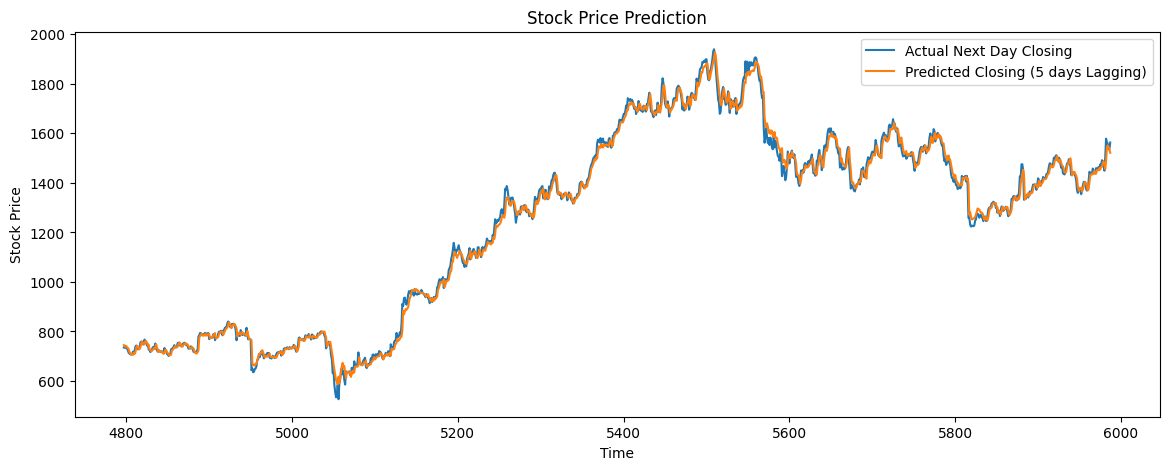

In [52]:
import matplotlib.pyplot as plt

predicted = preds_df['Predicted_5d']
actual = preds_df['Actual Next Day']

plt.figure(figsize=(14,5))

plt.plot(actual, label='Actual Next Day Closing')
plt.plot(predicted, label='Predicted Closing (5 days Lagging)')



plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


### Turning Regression into Classification

 Generating Trading Signals

  - To turn the model's regression output into actionable trading signals, we generate `buy`, `hold`, and `sell` signals based on the percentage change predictions. This classification step helps interpret the continuous predictions in terms of potential market actions.

Steps

- **Calculate Actual and Predicted Percentage Change**:
   - We create a new DataFrame `signal_df` and calculate the actual 5-day percentage change in stock price (`actual_pct_change`) as well as the predicted 5-day percentage change (`predicted_pct_change`).
   - `actual_pct_change` is shifted by -5 days to align with future price changes, and the predicted prices are shifted by -5 days as well.

- **Define Signals**:
   - We define `actual_signal` and `predicted_signal` as follows:
     - **Buy Signal (1)**: When the percentage change is greater than 2%.
     - **Sell Signal (2)**: When the percentage change is less than -2%.
     - **Hold Signal (0)**: When the percentage change is within ±2%.

In [53]:
signal_df = pd.DataFrame({'Actual Next Day':actual, 'Predicted':predicted, 'Closing':preds_df['Closing']})
signal_df['actual_pct_change'] = signal_df['Closing'].pct_change(5).shift(-5)

signal_df['Predicted'] = signal_df['Predicted'].shift(-5)

signal_df['predicted_pct_change'] = signal_df.apply(lambda row: (row['Predicted'] - row['Closing']) / row['Closing'], axis=1)

signal_df = signal_df.dropna()

signal_df

,Actual Next Day,Predicted,Closing,actual_pct_change,predicted_pct_change
4797,735.250000,733.392273,742.500000,-0.013468,-0.012266
4798,734.299988,726.158813,735.250000,-0.016729,-0.012365
4799,741.900024,714.455261,734.299988,-0.029892,-0.027025
4800,732.500000,710.572998,741.900024,-0.041313,-0.042225
4801,732.500000,705.872986,732.500000,-0.034881,-0.036351
...,...,...,...,...,...
5978,1488.500000,1542.010254,1491.150024,0.058512,0.034108
5979,1476.050049,1551.058838,1488.500000,0.050957,0.042028
5980,1449.000000,1544.621338,1476.050049,0.055723,0.046456
5981,1501.449951,1534.700195,1449.000000,0.060317,0.059144


In [54]:
signal_df['actual_signal'] = signal_df['actual_pct_change'].apply(lambda x: 1 if x > 0.02 else 2 if x < -0.02 else 0)
signal_df['predicted_signal'] = signal_df['predicted_pct_change'].apply(lambda x: 1 if x > 0.02 else 2 if x < -0.02 else 0)
signal_df

,Actual Next Day,Predicted,Closing,actual_pct_change,predicted_pct_change,actual_signal,predicted_signal
4797,735.250000,733.392273,742.500000,-0.013468,-0.012266,0,0
4798,734.299988,726.158813,735.250000,-0.016729,-0.012365,0,0
4799,741.900024,714.455261,734.299988,-0.029892,-0.027025,2,2
4800,732.500000,710.572998,741.900024,-0.041313,-0.042225,2,2
4801,732.500000,705.872986,732.500000,-0.034881,-0.036351,2,2
...,...,...,...,...,...,...,...
5978,1488.500000,1542.010254,1491.150024,0.058512,0.034108,1,1
5979,1476.050049,1551.058838,1488.500000,0.050957,0.042028,1,1
5980,1449.000000,1544.621338,1476.050049,0.055723,0.046456,1,1
5981,1501.449951,1534.700195,1449.000000,0.060317,0.059144,1,1


### Visualizing Signals
We visualize actual and predicted signals separately. The plots color-code segments of the stock price according to the trading signal:

- Green: Buy signal
- Red: Sell signal
- Blue: Hold signal

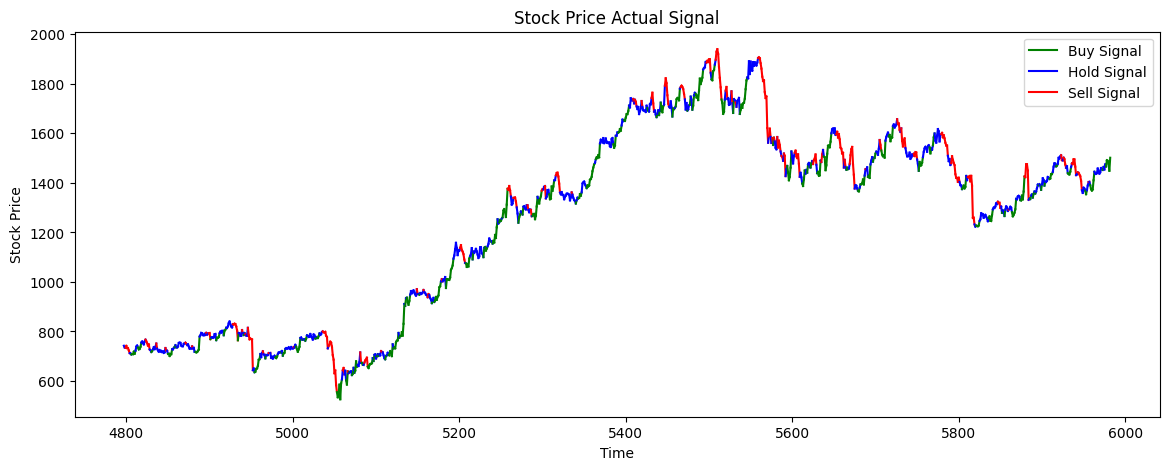

In [55]:
import matplotlib.lines as mlines

plt.figure(figsize=(14,5))

for i in range(len(signal_df)):
  color = 'red' if signal_df.iloc[i]['actual_signal'] == 2 else 'green' if signal_df.iloc[i]['actual_signal'] == 1 else 'blue'
  plt.plot(signal_df.iloc[i:i+2]['Closing'], color=color)

buy_legend = mlines.Line2D([], [], color='green', label='Buy Signal')
hold_legend = mlines.Line2D([], [], color='blue', label='Hold Signal')
sell_legend = mlines.Line2D([], [], color='red', label='Sell Signal')

plt.legend(handles=[buy_legend, hold_legend, sell_legend], loc="best")


plt.title("Stock Price Actual Signal")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()


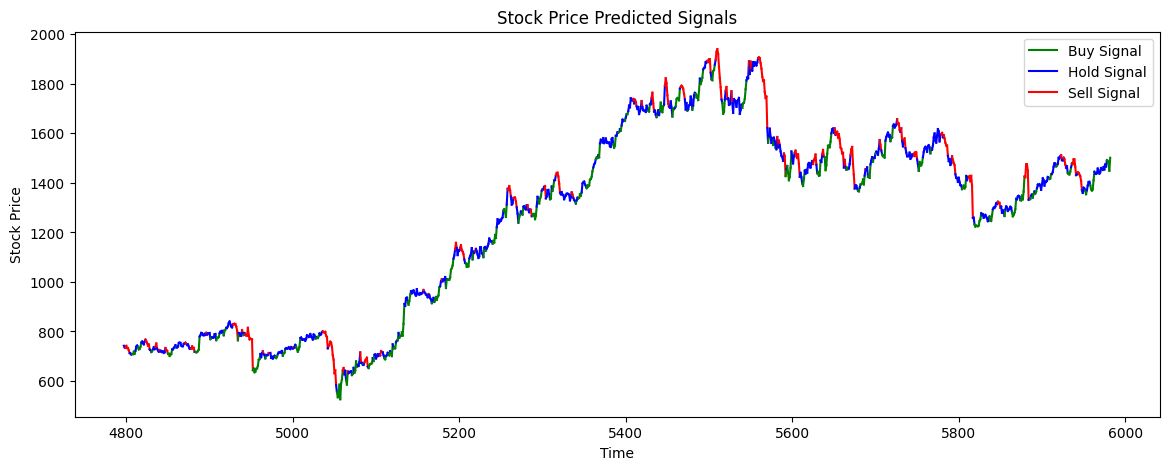

In [56]:
plt.figure(figsize=(14,5))

for i in range(len(signal_df)):
  color = 'red' if signal_df.iloc[i]['predicted_signal'] == 2 else 'green' if signal_df.iloc[i]['predicted_signal'] == 1 else 'blue'
  plt.plot(signal_df.iloc[i:i+2]['Closing'], color=color)

buy_legend = mlines.Line2D([], [], color='green', label='Buy Signal')
hold_legend = mlines.Line2D([], [], color='blue', label='Hold Signal')
sell_legend = mlines.Line2D([], [], color='red', label='Sell Signal')

plt.legend(handles=[buy_legend, hold_legend, sell_legend], loc="best")


plt.title("Stock Price Predicted Signals")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()


###  Performance Evaluation

After generating the predicted signals, we evaluate the model's classification performance. Here, we use a confusion matrix, classification report, and ROC curves to assess how accurately the model predicts `hold`, `buy`, and `sell` signals compared to actual market movements.

1. Classification Report and Confusion Matrix

  - The classification report provides precision, recall, and F1-score metrics for each class (`hold`, `buy`, and `sell`). The confusion matrix visually represents the performance of the model, showing how often actual signals are classified correctly or misclassified.

2. ROC Curves for Multi-Class Classification
  - Since this is a multi-class classification problem, we plot a one-vs-rest ROC curve for each signal (`hold`, `buy`, and `sell`). This shows the trade-off between true positive rate (TPR) and false positive rate (FPR) across each class. The area under the curve (AUC) value for each class provides insight into how well the model distinguishes between each signal type.

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       566
           1       0.95      0.80      0.87       374
           2       0.93      0.86      0.89       246

    accuracy                           0.88      1186
   macro avg       0.90      0.87      0.88      1186
weighted avg       0.89      0.88      0.88      1186



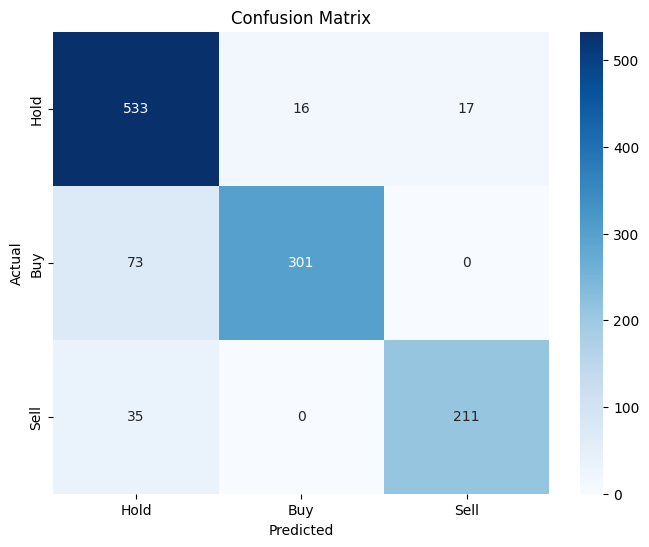

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(signal_df['actual_signal'], signal_df['predicted_signal']))

cm = confusion_matrix(signal_df['actual_signal'], signal_df['predicted_signal'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hold', 'Buy', 'Sell'], yticklabels=['Hold', 'Buy', 'Sell'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
import numpy as np

def sigmoid(x, threshold):
    return 1 / (1 + np.exp(-10 * (x - threshold)))  # The multiplier (e.g., 10) controls sharpness

predicted_pct_changes = signal_df['predicted_pct_change']

# Converting regression to probabilities for each class
prob_class_1 = sigmoid(predicted_pct_changes, 0.02)
prob_class_2 = sigmoid(-predicted_pct_changes, 0.02)
prob_class_0 = 1 - (prob_class_1 + prob_class_2)


In [59]:
# model.save('/content/drive/MyDrive/StockPrediction/model_infy.keras')

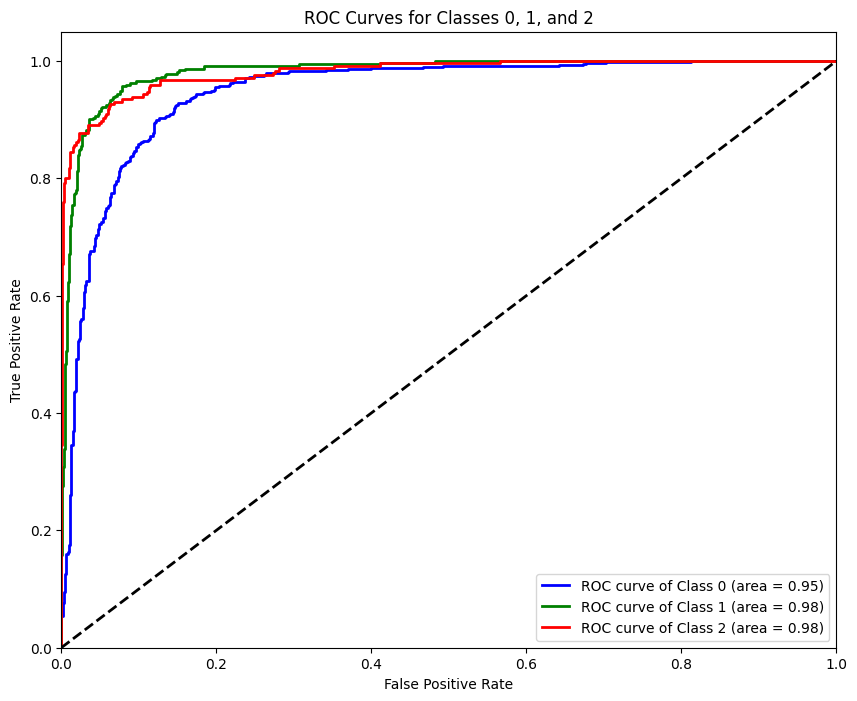

In [60]:
from sklearn.metrics import roc_curve, auc

# Assuming `true_labels` contains the true classes (0, 1, or 2)
fpr = {}
tpr = {}
roc_auc = {}

true_labels = signal_df['actual_signal']

for i, prob in enumerate([prob_class_0, prob_class_1, prob_class_2]):
    # Create binary labels for each class
    binary_labels = (true_labels == i).astype(int)

    # Compute ROC curve and ROC area
    fpr[i], tpr[i], t = roc_curve(binary_labels, prob)
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
class_names = ['Class 0', 'Class 1', 'Class 2']

for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classes 0, 1, and 2')
plt.legend(loc="lower right")
plt.show()


In [61]:
pd.DataFrame({0:prob_class_0, 1:prob_class_1, 2:prob_class_2, 'signal':signal_df['predicted_signal']})

,0,1,2,signal
4797,0.099298,0.420027,0.480675,0
4798,0.099292,0.419787,0.480921,0
4799,0.097888,0.384556,0.517556,2
4800,0.095395,0.349269,0.555336,2
4801,0.096478,0.362736,0.540786,2
...,...,...,...,...
5978,0.096852,0.535212,0.367936,1
5979,0.095434,0.554849,0.349718,1
5980,0.094527,0.565757,0.339716,1
5981,0.091511,0.596630,0.311859,1
